In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from ipynb.fs.full.SampleFromSKGM import kronecker_product

[[0.4631622  0.28945264 0.9762312 ]
 [0.52267224 0.9738782  0.762737  ]
 [0.86560017 0.93033075 0.21360742]]
(243, 243)
(5, 243, 243)


In [2]:
a   = np.array([[1,0,0],[1,0,0],[1,1,0]], dtype=float)
b   = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=float)
c   = kronecker_product(a,b)

sess   = tf.Session()
print(sess.run(c))

[[1. 0. 0. 2. 0. 0. 3. 0. 0.]
 [1. 0. 0. 2. 0. 0. 3. 0. 0.]
 [1. 1. 0. 2. 2. 0. 3. 3. 0.]
 [4. 0. 0. 5. 0. 0. 6. 0. 0.]
 [4. 0. 0. 5. 0. 0. 6. 0. 0.]
 [4. 4. 0. 5. 5. 0. 6. 6. 0.]
 [7. 0. 0. 8. 0. 0. 9. 0. 0.]
 [7. 0. 0. 8. 0. 0. 9. 0. 0.]
 [7. 7. 0. 8. 8. 0. 9. 9. 0.]]


In [3]:
d   = kronecker_product(c,a) # a.b.a
e   = kronecker_product(a,a)
e   = kronecker_product(e,b) # a.a.b

f   = kronecker_product(a,a)
g   = kronecker_product(b,b)
h   = kronecker_product(f,g) # (a.a).(b.b)

hh   = kronecker_product(a,a)
hh   = kronecker_product(hh,b)
hh   = kronecker_product(hh,b) # ((a.a).b).b



[d_out, e_out, h_out, hh_out]   = sess.run([d, e, h, hh])

# print(d_out)

Text(0.5, 1.0, '((a . a) . b) . b')

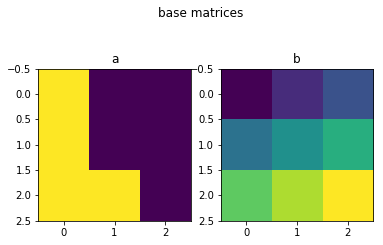

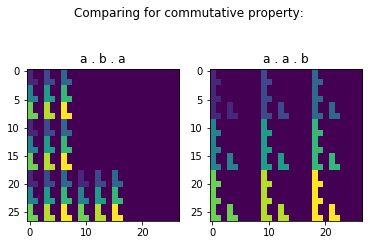

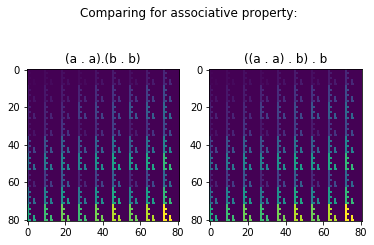

In [4]:
plt.figure()
plt.suptitle('base matrices')
plt.subplot(1,2,1)
plt.imshow(a)
plt.title('a')
plt.subplot(1,2,2)
plt.imshow(b)
plt.title('b')

plt.figure()
plt.suptitle('Comparing for commutative property:')
plt.subplot(1,2,1)
plt.imshow(d_out)
plt.title('a . b . a')
plt.subplot(1,2,2)
plt.imshow(e_out)
plt.title('a . a . b')


plt.figure()
plt.suptitle('Comparing for associative property:')
plt.subplot(1,2,1)
plt.imshow(h_out)
plt.title('(a . a).(b . b)')
plt.subplot(1,2,2)
plt.imshow(hh_out)
plt.title('((a . a) . b) . b')